<a href="https://colab.research.google.com/github/Qraree/jupyter-notebooks/blob/main/Segmentation_by_energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

In [32]:
def resize_img(image, size):
  width = int(image.shape[1] * size / 100)
  height = int(image.shape[0] * size / 100)
  dim = (width, height)

  return cv.resize(image, dim, interpolation = cv.INTER_AREA)


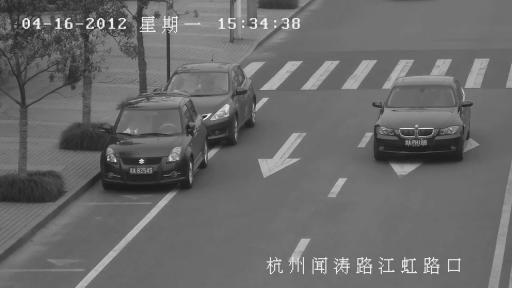

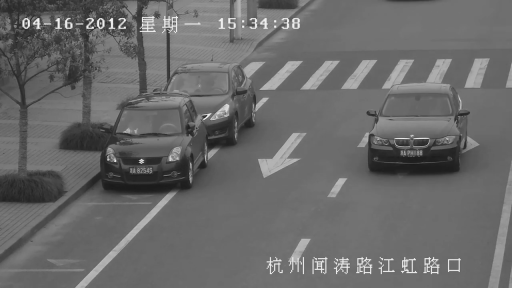

In [36]:
car_1 = cv.imread('frame1.png')
car_2 = cv.imread('frame2.png')

resize = 40

car_1_resized = resize_img(car_1, resize)
car_2_resized = resize_img(car_2, resize)

cv2_imshow(car_1_resized)
cv2_imshow(car_2_resized)

## Получение межкадровой разницы

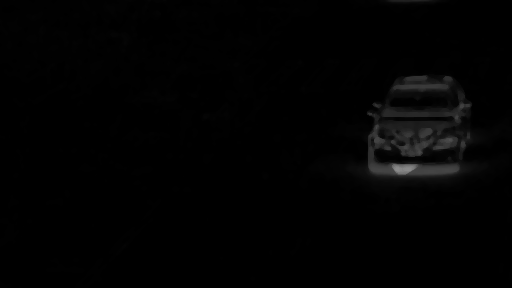

In [37]:
mad = cv.absdiff(car_2_resized, car_1_resized)

DELAY_BLUR = 100
MAX_KERNEL_LENGTH = 7

dst = None


for i in range(1, MAX_KERNEL_LENGTH, 2):
  mad = cv.medianBlur(mad, i)



cv2_imshow(mad)


## Получение контурного препарата

### Фильтр Собеля

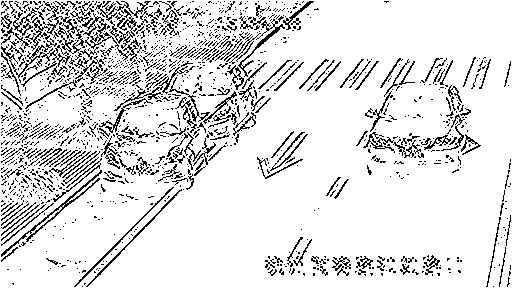

In [38]:
ddepth = cv.CV_8U
scale = 1
delta = 0
sobel = cv.Sobel(car_2_resized, -1, 1, 1, ksize=3)
ret, thresh1 = cv.threshold(sobel, 5, 255, cv.THRESH_BINARY_INV)
cv2_imshow(thresh1)

### Фильтр Кэнни

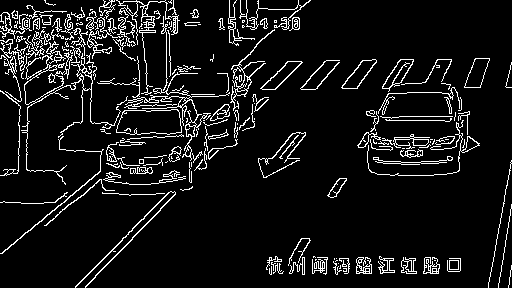

In [39]:
canny = cv.Canny(car_2_resized, 50, 200)
cv2_imshow(canny)

## Логическое И (Контурного препарата и межкадровой разницы)

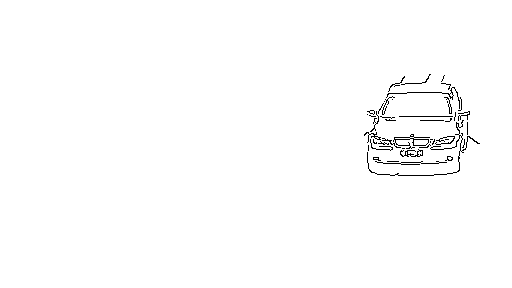

In [40]:

mad_gray = cv.cvtColor(mad, cv.COLOR_BGR2GRAY)

canny = cv.Canny(car_2_resized, 50, 200)
bit_and = np.bitwise_and(mad_gray, canny)

_, bit_thresh = cv.threshold(bit_and, 5, 255, cv.THRESH_BINARY_INV)
cv2_imshow(bit_thresh)

## Морфологическая фильтрация

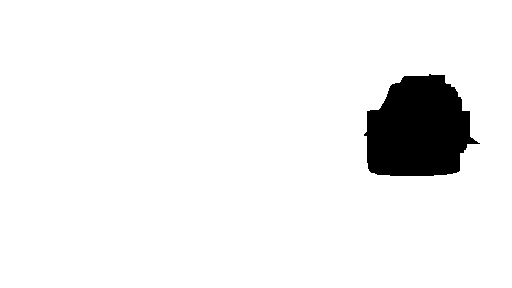

In [41]:
element = cv.getStructuringElement(cv.MORPH_RECT, (25, 25), (12, 12))
erosion = cv.morphologyEx(bit_thresh, cv.MORPH_ERODE, element)
dilation = cv.morphologyEx(erosion, cv.MORPH_DILATE, element)
result = dilation
cv2_imshow(result)

## Наложение строба на объект

<BarContainer object of 512 artists>

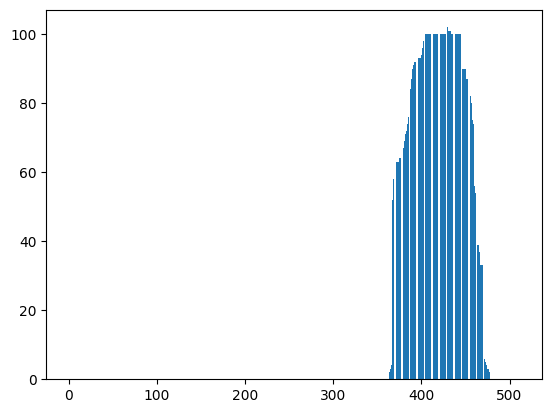

In [42]:
horizontal_result = np.array(result)
horizontal_result[horizontal_result == 0] = 1
horizontal_result[horizontal_result == 255] = 0

horizontal_sum = horizontal_result.sum(axis=0)
x = np.arange(len(horizontal_sum))
plt.bar(x, horizontal_sum)


<BarContainer object of 288 artists>

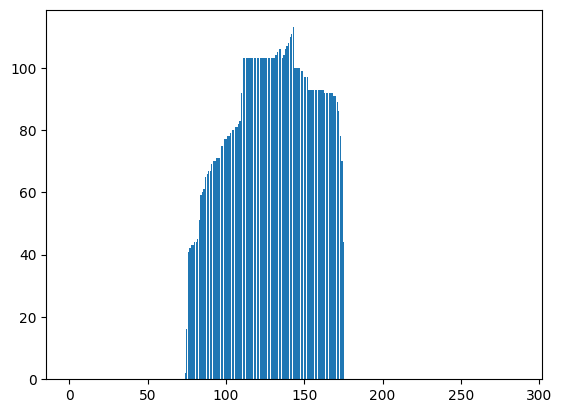

In [43]:
vertical_result = np.array(result)
vertical_result = np.transpose(vertical_result)
vertical_result[vertical_result == 0] = 1
vertical_result[vertical_result == 255] = 0
vertical_sum = vertical_result.sum(axis=0)
x = np.arange(len(vertical_sum))
plt.bar(x, vertical_sum)


57
